# Tabular Playground Series Dec 2021

In [ ]:
# Installing the modules

!pip3 install kaggle

In [ ]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from zipfile import ZipFile
from google.colab import files
from matplotlib import pyplot as plt

In [ ]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

In [ ]:
# Upload the creds

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anurag1817","key":"09b66f16e6edda0614443b2a02389465"}'}

In [ ]:
# Create kaggle folder

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Test the command

!kaggle competitions download -c tabular-playground-series-dec-2021

100% 98.9M/98.9M [00:04<00:00, 19.7MB/s]

  0% 0.00/2.11M [00:00<?, ?B/s]
100% 2.11M/2.11M [00:00<00:00, 143MB/s]
 40% 10.0M/24.7M [00:00<00:00, 99.3MB/s]
100% 24.7M/24.7M [00:00<00:00, 121MB/s] 


In [ ]:
# Extract the zip file

with ZipFile('/content/train.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('/content/test.csv.zip', 'r') as zf:
    zf.extractall('./')

with ZipFile('/content/sample_submission.csv.zip', 'r') as zf:
    zf.extractall('./')

In [ ]:
# Load the data

train = pd.read_csv('train.csv', index_col='Id')
train.head()

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
Id                            ...                                      
0        3189      40      8  ...            0            0           1
1        3026     182      5  ...            0            0           2
2        3106      13      7  ...            0            0           1
3        3022     276     13  ...            0            0           2
4        2906     186     13  ...            0            0           2

[5 rows x 55 columns]

In [ ]:
# Inspecting the data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000000 entries, 0 to 3999999
Data columns (total 55 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Elevation                           int64
 1   Aspect                              int64
 2   Slope                               int64
 3   Horizontal_Distance_To_Hydrology    int64
 4   Vertical_Distance_To_Hydrology      int64
 5   Horizontal_Distance_To_Roadways     int64
 6   Hillshade_9am                       int64
 7   Hillshade_Noon                      int64
 8   Hillshade_3pm                       int64
 9   Horizontal_Distance_To_Fire_Points  int64
 10  Wilderness_Area1                    int64
 11  Wilderness_Area2                    int64
 12  Wilderness_Area3                    int64
 13  Wilderness_Area4                    int64
 14  Soil_Type1                          int64
 15  Soil_Type2                          int64
 16  Soil_Type3                          

Elevation        Aspect  ...   Soil_Type40    Cover_Type
count  4.000000e+06  4.000000e+06  ...  4.000000e+06  4.000000e+06
mean   2.980192e+03  1.515857e+02  ...  3.161850e-02  1.771335e+00
std    2.890482e+02  1.099611e+02  ...  1.749822e-01  8.938060e-01
min    1.773000e+03 -3.300000e+01  ...  0.000000e+00  1.000000e+00
25%    2.760000e+03  6.000000e+01  ...  0.000000e+00  1.000000e+00
50%    2.966000e+03  1.230000e+02  ...  0.000000e+00  2.000000e+00
75%    3.217000e+03  2.470000e+02  ...  0.000000e+00  2.000000e+00
max    4.383000e+03  4.070000e+02  ...  1.000000e+00  7.000000e+00

[8 rows x 55 columns]

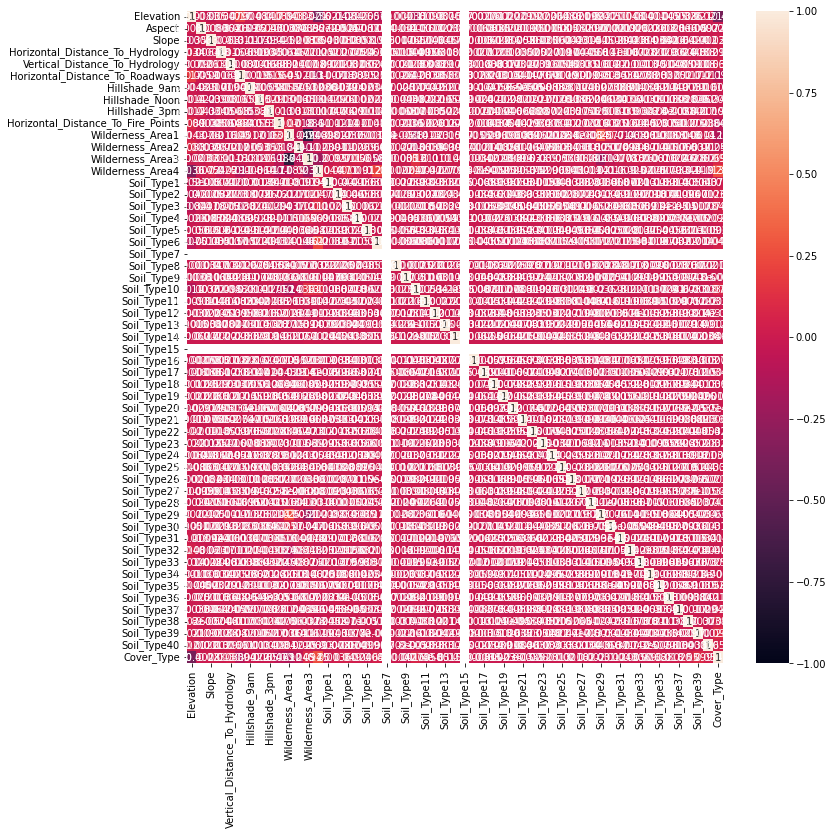

In [ ]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
# Load the data

test = pd.read_csv('test.csv', index_col='Id')
test.head()

Elevation  Aspect  Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
Id                                 ...                                       
4000000       2763      78     20  ...            0            0            0
4000001       2826     153     11  ...            0            0            0
4000002       2948      57     19  ...            0            0            0
4000003       2926     119      6  ...            0            0            0
4000004       2690      10      4  ...            0            0            0

[5 rows x 54 columns]

There are no missing values

In [ ]:
# Missing values

if train.isna().any().any():
    print(train.isna().sum()/train.shape[0])
else:
    print("No Missing values")

No Missing values


In [ ]:
# Seperating out features and labels

X = train.drop(['Cover_Type'], axis=1)
y = pd.get_dummies(train['Cover_Type'])

## Model

In [ ]:
# Model Definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(54, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
# Compiling the model

optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.categorical_crossentropy
metrics = 'acc'

model.compile(optimizer=optim, loss=loss, metrics=[metrics])

In [ ]:
# Fitting the model

epochs = 10
batch_size = 32

history = model.fit(X, y, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/10
100000/100000 [==============================] - 393s 4ms/step - loss: 0.8949 - acc: 0.5777 - val_loss: 1.0276 - val_acc: 0.5168
Epoch 2/10
100000/100000 [==============================] - 390s 4ms/step - loss: 0.8947 - acc: 0.5777 - val_loss: 1.0264 - val_acc: 0.5168
Epoch 3/10
100000/100000 [==============================] - 427s 4ms/step - loss: 0.8947 - acc: 0.5777 - val_loss: 1.0270 - val_acc: 0.5168
Epoch 4/10
100000/100000 [==============================] - 438s 4ms/step - loss: 0.8949 - acc: 0.5777 - val_loss: 1.0298 - val_acc: 0.5168
Epoch 5/10
100000/100000 [==============================] - 436s 4ms/step - loss: 0.8947 - acc: 0.5777 - val_loss: 1.0281 - val_acc: 0.5168
Epoch 6/10
100000/100000 [==============================] - 432s 4ms/step - loss: 0.8946 - acc: 0.5777 - val_loss: 1.0251 - val_acc: 0.5168
Epoch 7/10
100000/100000 [==============================] - 396s 4ms/step - loss: 0.8946 - acc: 0.5777 - val_loss: 1.0258 - val_acc: 0.5168
Epoch 8/10
100000/10

In [ ]:
# Model Prediction

preds = model.predict(test)
preds

In [ ]:
# Generating output file

submission = pd.read_csv('/content/sample_submission.csv')
submission['Cover_Type'] = preds
submission.to_csv('output.csv', index=False)

In [ ]:
# Submission

!kaggle competitions submit -c tabular-playground-series-dec-2021 -f output.csv -m "TF loss=cce metrics=auc without error"